# Notebook Contents 
01. Importing Libraries
02. Importing Data
03. Security implications and PII
04. Spending habits by region
05. Exclusion flag for low-activity customers
06. Customer profiling by age, income, certain goods, and number of dependants
07. Exporting Visualizations


# 01. Importing Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
#Creating path
path =r'C:\Users\smflo\Documents\03-2023 Instacart Basket Analysis'

In [61]:
df_ords_prod_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_2.pkl'))

# 03. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
#Viewing first 5 rows of dataframe
df_ords_prod_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,number_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
#Overview of dataframe
df_ords_prod_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float32 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float32 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_period_of_day   object  
 17  max_order               int64   
 18  loyalty_flag            object  
 19  average_price           float32 
 20  spending_flag           object  
 21  median

#Customer names were removed in a previous task. There is currently no PII in the dataframe.

# 04. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [63]:
#Creating list for Northeast region
region_1_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [64]:
#Creating list for Midwest region
region_2_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [65]:
#Creating list for South region
region_3_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [66]:
#Creating list for West region
region_4_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [67]:
#Creating condition
df_ords_prod_cust.loc[df_ords_prod_cust['state'].isin(region_1_NE), 'region'] = 'Northeast'

In [68]:
#Creating condition
df_ords_prod_cust.loc[df_ords_prod_cust['state'].isin(region_2_MW), 'region'] = 'Midwest'

In [69]:
#Creating condition
df_ords_prod_cust.loc[df_ords_prod_cust['state'].isin(region_3_S), 'region'] = 'South'

In [70]:
#Creating condition
df_ords_prod_cust.loc[df_ords_prod_cust['state'].isin(region_4_W), 'region'] = 'West'

In [71]:
#Checking region value counts
df_ords_prod_cust['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [15]:
#Viewing first 5 rows of dataframe
df_ords_prod_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,number_dependants,marital_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [72]:
#Creating crosstab between region and spending flag
crosstab_spending_habits = pd.crosstab (df_ords_prod_cust['spending_flag'], df_ords_prod_cust['region'], dropna = False)

In [73]:
#View crosstab output
crosstab_spending_habits

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


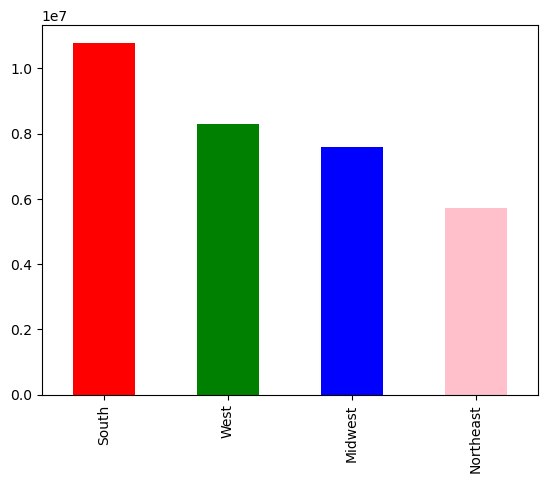

In [74]:
#Creating bar chart
barchart_spending_habits = df_ords_prod_cust['region'].value_counts().plot.bar(color = ['red', 'green', 'blue', 'pink'])

#The South spends the most and has the highest number of orders comapred to the other regions. The Northeast spends the least and has the fewest number of orders.

# 05. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [12]:
#Creating 'activity_flag' for low-activity customers (<5 orders)
df_ords_prod_cust.loc[df_ords_prod_cust['max_order']<5, 'activity_flag'] = 'low activity'

In [13]:
#Creating 'activity_flag' for high-activity customers (>=5 orders)
df_ords_prod_cust.loc[df_ords_prod_cust['max_order']>=5, 'activity_flag'] = 'high activity'

In [14]:
#Checking value counts
df_ords_prod_cust['activity_flag'].value_counts(dropna = False)

high activity    30964564
low activity      1440295
Name: activity_flag, dtype: int64

In [15]:
#Creating subset for high-activity customers
high_activity_customer = df_ords_prod_cust[df_ords_prod_cust['activity_flag'] == 'high activity']

In [16]:
#Creating subset for low-activity customers
low_activity_customer = df_ords_prod_cust[df_ords_prod_cust['activity_flag'] == 'low activity']

In [17]:
#Exporting low_activity_customer dataframe
low_activity_customer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [18]:
#Exporting high_activity_customer dataframe
high_activity_customer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

# 06. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Profiling based on age

In [3]:
#Importing high_activity_customers dataframe
high_activity_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [4]:
#Profiling variable based on 'age'
high_activity_customers['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#Age range goes from 18 to 81 years old. We can break this down into 3 groups: 18-39 Young Adults, 40-64 Middle Age, and 65+ Seniors. 

In [5]:
#Creating conditions for 'age_category' 
high_activity_customers.loc[(high_activity_customers['age'] >=18) & (high_activity_customers['age'] < 40), 'age_category'] = 'young adults'

In [6]:
#Creating conditions for 'age_category' 
high_activity_customers.loc[(high_activity_customers['age'] >=40) & (high_activity_customers['age'] < 65), 'age_category'] = 'middle age'

In [7]:
#Creating conditions for 'age_category' 
high_activity_customers.loc[(high_activity_customers['age'] >=65), 'age_category'] = 'senior'

In [8]:
#Viewing first 5 rows 
high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_dependants,marital_status,income,region,activity_flag,age_category
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,young adults
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,young adults
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,young adults
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,young adults
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,young adults


In [9]:
#Checking value counts
high_activity_customers['age_category'].value_counts(dropna = False)

middle age      12103910
young adults    10665110
senior           8195544
Name: age_category, dtype: int64

#Middle age group make up the largest group of Instacart customers

In [10]:
#Crosstab on age_category and marital_status
crosstab_age_marital_status = pd.crosstab (high_activity_customers['age_category'], high_activity_customers['marital_status'], dropna = False)

In [11]:
#Checking output
crosstab_age_marital_status

marital_status,divorced/widowed,living with parents and siblings,married,single
age_category,,,,
middle age,623313,0,9046762,2433835
senior,2021958,0,6173586,0
young adults,0,1481172,6523363,2660575


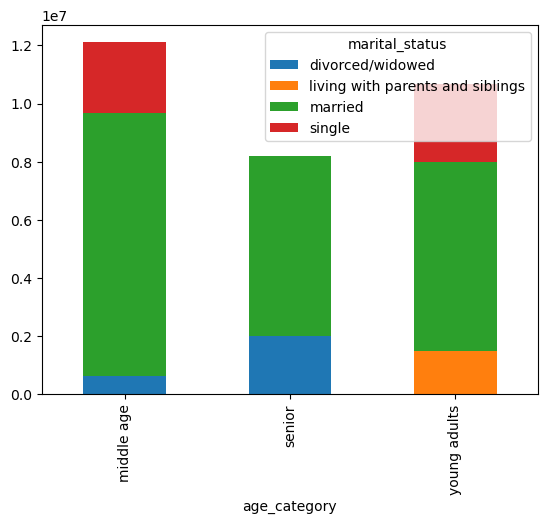

In [12]:
#Creating stacked bar chart
bar_chart_age_marital_status = crosstab_age_marital_status.plot(kind='bar', stacked=True)

#Across all age groups, those that are married make up the majority of Instacart's customers. The middle age group, has the largest number of married customers.

In [13]:
#Age category usage frequency aggregation
high_activity_customers.groupby('age_category').agg({'prices': ['mean', 'min', 'max']})

prices              
                   mean  min      max
age_category                         
middle age    11.944899  1.0  99999.0
senior        11.757769  1.0  99999.0
young adults  12.055665  1.0  99999.0

#Average price among all age groups is around 12.

In [14]:
#Grouping orders by age category, hour, and count
order_count_by_age_hour = high_activity_customers.groupby(['age_category', 'order_hour_of_day'])['order_id'].count()

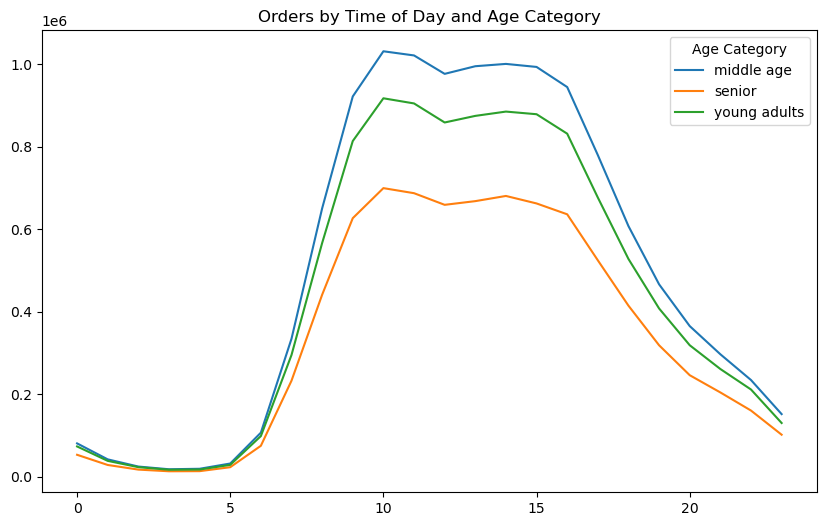

In [16]:
#Creating line chart
fig, ax = plt.subplots(figsize=(10, 6))

for age_category in order_count_by_age_hour.index.levels[0]:
    ax.plot(order_count_by_age_hour.loc[age_category].index, order_count_by_age_hour.loc[age_category].values, label=age_category)
    plt.title('Orders by Time of Day and Age Category')
plt.legend(title='Age Category')

### Profiling based on income

In [17]:
#Profiling variable based on 'income'
high_activity_customers['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

#Minimum income is 25,903, and the maximum is 593,901. We can group them into 4 groups: low income = <70,000, middle-class =70,000-100,000, upper-middle-class = 100,000-130,000 and high = >130,000. Quartiles were used to create the 4 income groups.

In [18]:
#Creating conditions for 'income_category' 
high_activity_customers.loc[high_activity_customers['income']< 70000, 'income_category'] = 'Low'

In [19]:
#Creating conditions for 'income_category' 
high_activity_customers.loc[(high_activity_customers['income']>= 70000) & (high_activity_customers['income']< 100000), 'income_category'] = 'Middle-class'

In [20]:
#Creating conditions for 'income_category' 
high_activity_customers.loc[(high_activity_customers['income']>= 100000) & (high_activity_customers['income']< 130000), 'income_category'] = 'Upper-middle-class'

In [21]:
#Creating conditions for 'income_category' 
high_activity_customers.loc[high_activity_customers['income']>= 130000, 'income_category'] = 'High'

In [22]:
#Viewing first 5 rows
high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,number_dependants,marital_status,income,region,activity_flag,age_category,income_category
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,high activity,young adults,Low
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,high activity,young adults,Low
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,high activity,young adults,Low
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,high activity,young adults,Low
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,high activity,young adults,Low


In [23]:
#Checking value counts
high_activity_customers['income_category'].value_counts(dropna = False)

Low                   8520533
Middle-class          8236629
High                  7401414
Upper-middle-class    6805988
Name: income_category, dtype: int64

#Low income group make up largest group of Instacart customers

In [24]:
#Crosstab on age_category and income_status
crosstab_age_income_status = pd.crosstab (high_activity_customers['age_category'], high_activity_customers['income_category'], dropna = False)

In [25]:
#Checking output
crosstab_age_income_status

income_category,High,Low,Middle-class,Upper-middle-class
age_category,,,,
middle age,4275986,1872735,2110772,3844417
senior,3002489,1123892,1329889,2739274
young adults,122939,5523906,4795968,222297


#Middle age, high income makes up the largest customer group

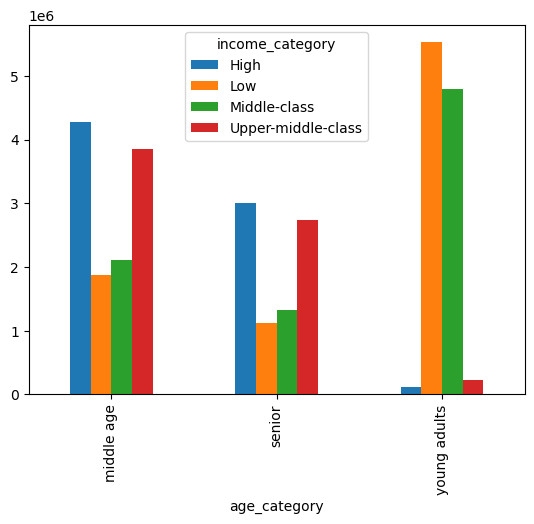

In [26]:
#Create a grouped bar chart
bar_chart_age_income = crosstab_age_income_status.plot(kind='bar')

In [27]:
#Crosstab region and income_status
crosstab_region_income_status = pd.crosstab (high_activity_customers['region'], high_activity_customers['income_category'], dropna = False)

In [28]:
#Checking output
crosstab_region_income_status

income_category,High,Low,Middle-class,Upper-middle-class
region,,,,
Midwest,1763002,1974266,1887154,1637091
Northeast,1308807,1486808,1461393,1207677
South,2442801,2849538,2797656,2221144
West,1886804,2209921,2090426,1740076


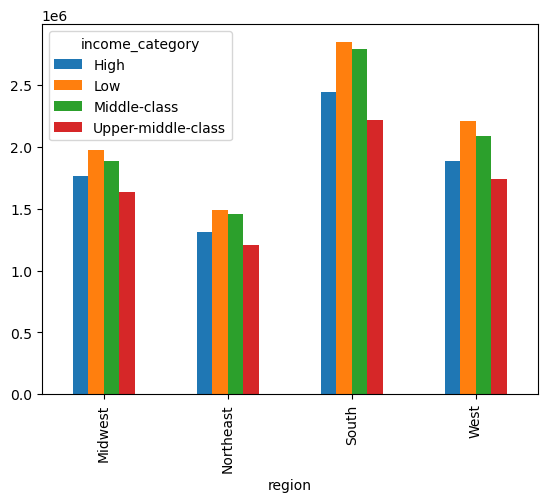

In [29]:
#Creating a grouped bar chart
bar_chart_region_income = crosstab_region_income_status.plot(kind='bar')

#Low and middle class make up most customers across all regions. South has largest number of customers.

In [30]:
#Income category expenditure aggregation
high_activity_customers.groupby('income_category').agg({'prices' : ['mean', 'min', 'max']})

prices              
                         mean  min      max
income_category                            
High                22.388092  1.0  99999.0
Low                  7.366964  1.0  14900.0
Middle-class         8.847132  1.0  99999.0
Upper-middle-class  10.016437  1.0  99999.0

#The higher the income, the higher the average price spent.

### Profiling based on certain goods

In [31]:
#Importing departments data frame
df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [32]:
#Profiling variable 'department'
high_activity_customers['department_id'].value_counts(dropna = False)

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

In [33]:
#Viewing data frame
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [34]:
#Renaming column
df_depts.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [35]:
#Viewing data frame
df_depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [36]:
#Creating list
dept_list = dict(zip(df_depts['department_id'], df_depts['department']))

In [37]:
#Viewing list
dept_list

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [38]:
#Mapping department_id with dept_list
high_activity_customers['department'] = high_activity_customers['department_id'].map(dept_list)

In [39]:
#Profiling variable 'department'
high_activity_customers['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [40]:
#Creating conditions for 'baby_category' 
high_activity_customers.loc[high_activity_customers['department'] == 'babies', 'has_baby'] = 'yes'

In [41]:
#Creating conditions for 'baby_category' 
high_activity_customers.loc[high_activity_customers['department'] != 'babies', 'no_baby'] = 'no'

In [42]:
#Checking value counts
high_activity_customers['has_baby'].value_counts(dropna = False)

NaN    30554172
yes      410392
Name: has_baby, dtype: int64

In [43]:
#Crosstab on certain goods and age group
crosstab_certain_goods_age = pd.crosstab (high_activity_customers['age_category'], high_activity_customers['has_baby'], dropna = False)

In [44]:
#Checking output
crosstab_certain_goods_age

has_baby,yes
age_category,
middle age,162732
senior,106204
young adults,141456


#Middle age group purchases most baby products

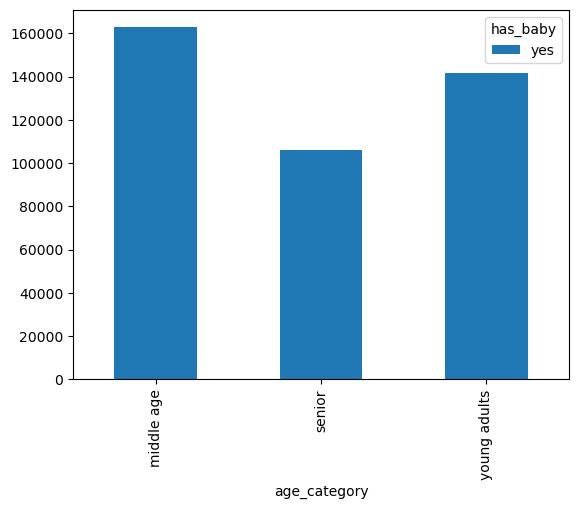

In [45]:
#Creating grouped bar chart
certain_good_age_chart = crosstab_certain_goods_age.plot(kind='bar')

In [46]:
#Crosstab on certain goods and regions
crosstab_certain_goods_regions = pd.crosstab (high_activity_customers['region'], high_activity_customers['has_baby'], dropna = False)

In [47]:
#Checking output
crosstab_certain_goods_regions

has_baby,yes
region,
Midwest,95741
Northeast,72712
South,139511
West,102428


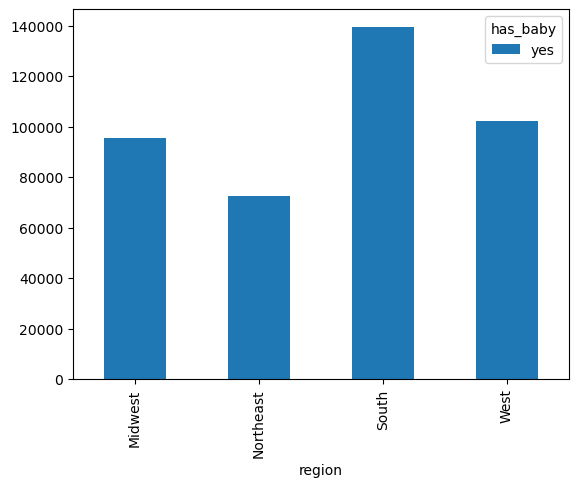

In [48]:
#Creating a grouped bar chart
certain_good_regions_chart = crosstab_certain_goods_regions.plot(kind='bar')

#The south buys the largest number of baby products.

In [49]:
#Customers buying baby products in usage frequency aggregation
high_activity_customers.groupby('has_baby').agg({'prices' : ['mean', 'min', 'max']})

prices           
              mean  min   max
has_baby                     
yes       7.634399  1.0  15.0

#Average price spent on baby products is 7.63

### Profiling based on number of dependants

In [50]:
#Profiling variable based on 'number_dependants'
high_activity_customers['number_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_dependants, dtype: float64

#Number of dependants varies from 0-3. We can group them into 3 groups: small= 0-1 dependants, mid-sized= 2 dependants, large= 3 dependants

In [51]:
#Creating conditions for 'number_dependants' 
high_activity_customers.loc[(high_activity_customers['number_dependants'] == 0) | (high_activity_customers['number_dependants'] == 1), 'family_size'] = 'Small'

In [52]:
#Creating conditions for 'number_dependants' 
high_activity_customers.loc[high_activity_customers['number_dependants'] == 2, 'family_size'] = 'Mid sized'

In [53]:
#Creating conditions for 'number_dependants' 
high_activity_customers.loc[high_activity_customers['number_dependants'] == 3, 'family_size'] = 'Large'

In [54]:
#Viewing first 5 rows
high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,marital_status,income,region,activity_flag,age_category,income_category,department,has_baby,no_baby,family_size
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,married,40423,South,high activity,young adults,Low,beverages,NaN,no,Large
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,married,40423,South,high activity,young adults,Low,beverages,NaN,no,Large
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,South,high activity,young adults,Low,beverages,NaN,no,Large
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,married,40423,South,high activity,young adults,Low,beverages,NaN,no,Large
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,South,high activity,young adults,Low,beverages,NaN,no,Large


In [55]:
#Checking value counts
high_activity_customers['family_size'].value_counts(dropna = False)

Small        15458787
Large         7772516
Mid sized     7733261
Name: family_size, dtype: int64

#Small families make up largest customer group

In [56]:
#crosstab on marital status and family size
crosstab_marital_status_family_size = pd.crosstab (high_activity_customers['family_size'], high_activity_customers['marital_status'], dropna = False)

In [57]:
#Checking output
crosstab_marital_status_family_size

marital_status,divorced/widowed,living with parents and siblings,married,single
family_size,,,,
Large,0,488469,7284047,0
Mid sized,0,484658,7248603,0
Small,2645271,508045,7211061,5094410


#Single and divorced/widowed people only have small families. 

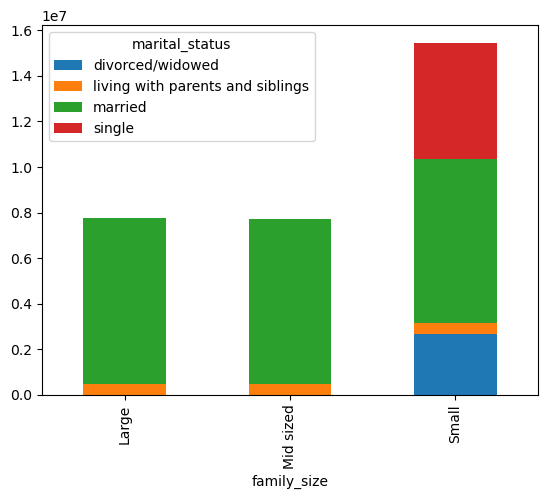

In [58]:
#Creating stacked bar chart
bar_chart_marital_status_size = crosstab_marital_status_family_size.plot(kind='bar', stacked=True)

#Large and mid-sized families are comprised of married people and those living with parents and siblings.

In [59]:
#family size products prices usage frequency aggregation
high_activity_customers.groupby('family_size').agg({'prices' : ['mean', 'min', 'max']})

prices              
                  mean  min      max
family_size                         
Large        11.791609  1.0  99999.0
Mid sized    12.284472  1.0  99999.0
Small        11.829309  1.0  99999.0

#Average price spent by all family sizes is around 12.

# 07. Exporting Visualizations

In [75]:
#Exporting bar chart
barchart_spending_habits.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','barchart_spending_habits'))

In [76]:
#Exporting bar chart
bar_chart_age_marital_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_age_marital_status'))

In [77]:
#Exporting bar chart
bar_chart_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_age_income_status'))

In [78]:
#Exporting bar chart
certain_good_age_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_product_age'))

In [79]:
#Exporting bar chart
bar_chart_marital_status_size.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_marital_status_size'))

In [80]:
#Exporting bar chart
bar_chart_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_region_income_status'))

In [81]:
#Exporting bar chart
certain_good_regions_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_goods_regions'))